In [1]:
import sys
sys.path.insert(0, '/Users/luna/Desktop/CRBM/Standards/TabularQual')

In [2]:
import os, maboss
from tabularqual.convert_sbml_to_spreadsheet import convert_sbml_to_spreadsheet
from tabularqual.convert_spreadsheet_to_sbml import convert_spreadsheet_to_sbml
from tabularqual.sbml_reader import read_sbml
import matplotlib.pyplot as plt
import numpy as np

ipylab module is not installed, menus and toolbar are disabled.


In [3]:
for model in os.listdir("maboss"):
    print(model)
    sbml_spreadsheet_errors = []
    spreadsheet_sbml_errors = []
    if model.endswith(".sbml") and not model.endswith("_new.sbml"):
        sbml_file = os.path.join("maboss", model)
        spreadsheet_file = ".".join(sbml_file.split(".")[:-1]) + ".xlsx"
        new_sbml_file = ".".join(sbml_file.split(".")[:-1]) + "_new.sbml"
        try:
            convert_sbml_to_spreadsheet(
                sbml_file,
                spreadsheet_file,
                template_path=None,  # No template to skip README/Appendix
                rule_format="operators",
                validate=False, # no validation
                print_messages=False, # no messages,
                use_name=False
            )
        except:
            sbml_spreadsheet_errors.append(model)

        try:
            convert_spreadsheet_to_sbml(
                spreadsheet_file,
                new_sbml_file,
                interactions_anno=False, # no existing interaction annotations
                transitions_anno=True,
                validate=False, # no validation
                print_messages=False, # no messages,
                use_name=False
            )
        except:
            spreadsheet_sbml_errors.append(model)


5025.xlsx
SeaUrchin_model_ginsim.sbml
Corral_ThIL17diff_15jan2021.xlsx
Cohen_new.sbml
Cacace_TdevModel_2nov2020.sbml
Cohen.sbml
Montagud2021_Prostate_Cancer.sbml
Tumour Cell Invasion and Migration (SBML).xlsx
Cacace_TdevModel_2nov2020_new.sbml
Montagud2021_Prostate_Cancer_new.sbml
cell_fate.xlsx
BIOMD0000000562_url.xlsx
2176.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.xlsx
MODEL1506260000_url.xlsx
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.sbml
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018_new.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.sbml
Corral_ThIL17diff_15jan2021_new.sbml
2176.xlsx
Tumour Cell Invasion and Migration (SBML)_new.sbml
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.xlsx
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018_new.sbml
MODEL1506260000_url.sbml
cell_fate_new.sbml
Corral_ThIL17diff_15jan2021.sbml
5025.sbml
SeaUrchin_model_ginsim_new.sbml
SeaUrchin_model_ginsim.xlsx
cell_f

In [4]:
sbml_spreadsheet_errors

[]

In [5]:
spreadsheet_sbml_errors

[]

In [6]:
cant_load = []
cant_simulate = []
results = {}
for model in os.listdir("maboss"):
    if model.endswith(".sbml") and not model.endswith("_new.sbml"):
        sbml_file = os.path.join("maboss", model)
        spreadsheet_file = ".".join(sbml_file.split(".")[:-1]) + ".xlsx"
        new_sbml_file = ".".join(sbml_file.split(".")[:-1]) + "_new.sbml"
        if os.path.exists(new_sbml_file):
            print(model)
            m = maboss.loadSBML(sbml_file)
            
            try:
                m_new = maboss.loadSBML(new_sbml_file)
            except:
                cant_load.append(model)
                continue
            
            m.update_parameters(max_time=100, time_tick=10, sample_count=100000, thread_count=16)
            for node in m.network:
                m.network.set_istate(node, [0.5, 0.5])
            r = m.run(cmaboss=True)
            
            try:
                m_new.update_parameters(max_time=100, time_tick=10, sample_count=100000, thread_count=16)
                for node in m_new.network:
                    m_new.network.set_istate(node, [0.5, 0.5])
                r_new = m_new.run(cmaboss=True)
            except:
                cant_simulate.append(model)
                continue

            # fig, ax = plt.subplots(1,2)
            # r.plot_piechart(axes=ax[0])
            # r_new.plot_piechart(axes=ax[1])
            results[model] = (r.get_nodes_probtraj(), r_new.get_nodes_probtraj())

SeaUrchin_model_ginsim.sbml
Cacace_TdevModel_2nov2020.sbml
Cohen.sbml
Montagud2021_Prostate_Cancer.sbml
2176.sbml
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.sbml
Corral_ThIL17diff_15jan2021.sbml
5025.sbml
cell_fate.sbml
Tumour Cell Invasion and Migration (SBML).sbml


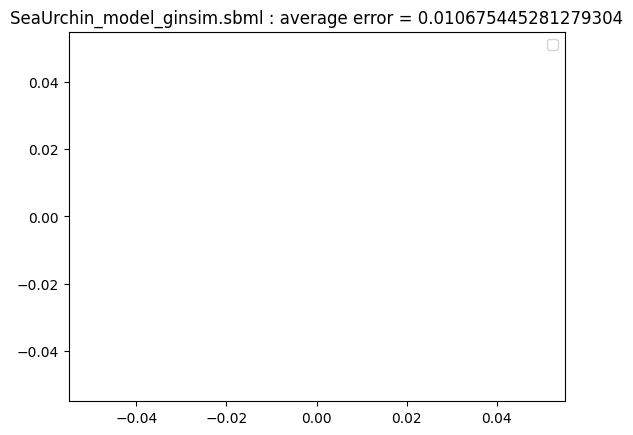

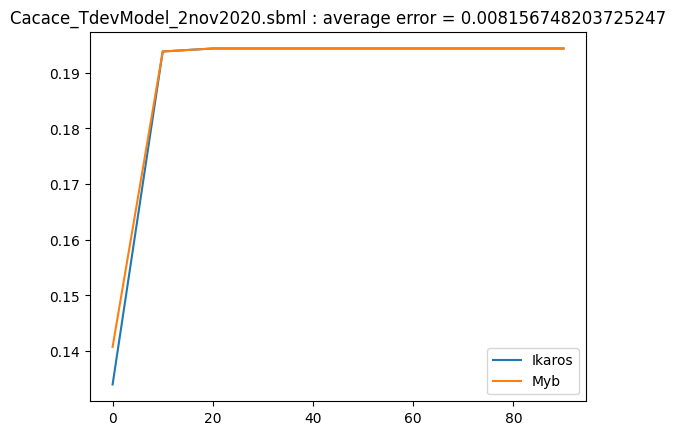

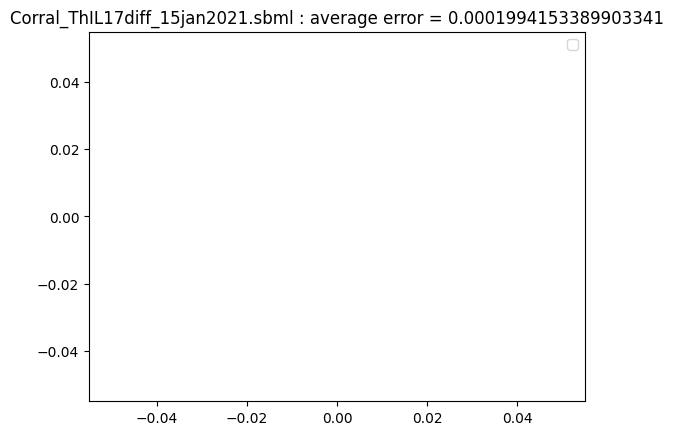

In [7]:
for model, (result, new_result) in results.items():
    average_diff = np.mean(abs(result - new_result))   
    if average_diff > 0:
        diff = abs(result-new_result)
        avg_diff = diff.mean(axis=0)
        index_diff = list(avg_diff[avg_diff > 0.1].index)
        plt.figure()
        plt.title(f"{model} : average error = {average_diff}")
        plt.plot(diff[index_diff])
        plt.legend(diff[index_diff].columns)

Cacace_TdevModel_2nov2020.sbml


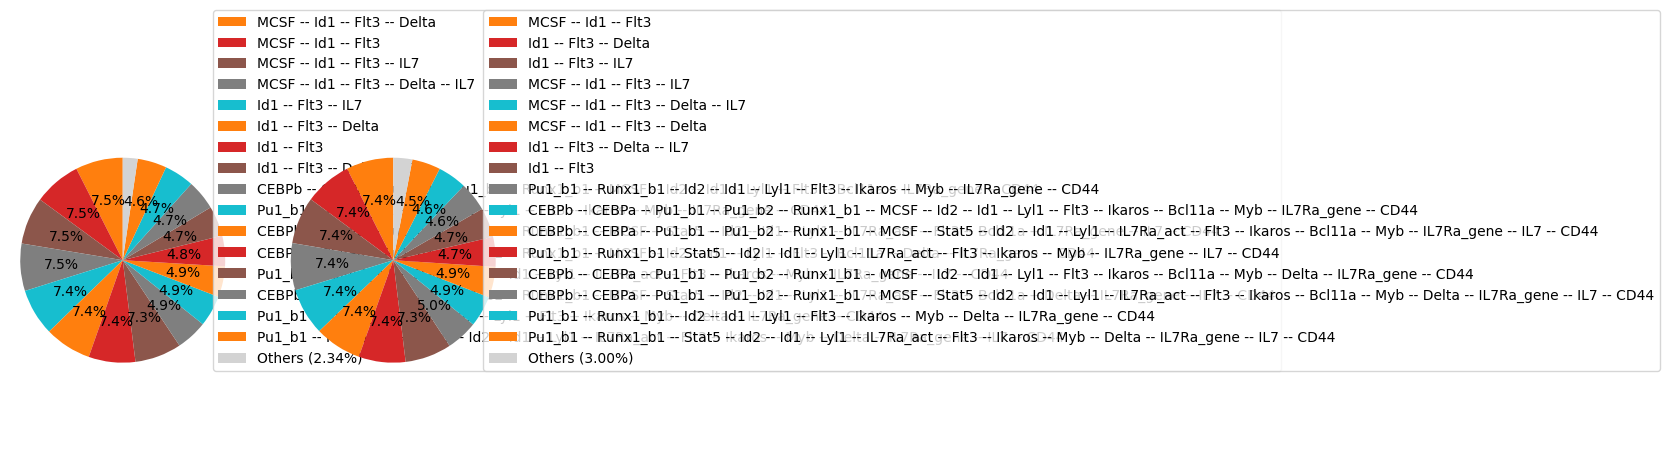

In [ ]:
model = "Cacace_TdevModel_2nov2020.sbml"
sbml_file = os.path.join("maboss", model)
spreadsheet_file = ".".join(sbml_file.split(".")[:-1]) + ".xlsx"
new_sbml_file = ".".join(sbml_file.split(".")[:-1]) + "_new.sbml"
if os.path.exists(new_sbml_file):
    print(model)
    m = maboss.loadSBML(sbml_file)
    m_new = maboss.loadSBML(new_sbml_file)
    
    m.update_parameters(max_time=100, time_tick=10, sample_count=100000, thread_count=16)
    for node in m.network:
        m.network.set_istate(node, [0.5, 0.5])
    r = m.run(cmaboss=True)
    
    m_new.update_parameters(max_time=100, time_tick=10, sample_count=100000, thread_count=16)
    for node in m_new.network:
        m_new.network.set_istate(node, [0.5, 0.5])
    r_new = m_new.run(cmaboss=True)

    fig, ax = plt.subplots(1,2)
    r.plot_piechart(axes=ax[0])
    r_new.plot_piechart(axes=ax[1])


In [10]:
r.get_nodes_probtraj() - r_new.get_nodes_probtraj()

,Bcl11a,Bcl11b,CD25,CD3e,CD3g,CD44,CD45,CEBPa,CEBPb,Delta,Deltex,E2A_gene,E2A_protein,EBF1,Ets1,Flt3,Foxo1,Gata3_b1,Gata3_b2,Gfi1,Gfi1b,HEB,HEB_E2A,HEB_gene,Hes1,Hhex,IL7,IL7Ra_act,IL7Ra_gene,Id1,Id2,Id3,Ikaros,Kit,Lat,Lef1_b1,Lef1_b2,Lmo2,Lyl1,MCSF,Myb,NTC,Notch1_rec,Notch_gene_b1,Notch_gene_b2,Nrarp,Pax5,Pu1_b1,Pu1_b2,Rag1,Runx1_b1,Runx1_b2,Runx3,Scl,Scl_E2A,Stat5,TCF1,TCRb,Zap70,pTa,prog_ass_Eprot
0.0,-0.007840,-0.001285,0.000475,-0.000185,-0.001162,-0.000405,-0.000106,-0.004334,-0.006175,1.720846e-14,0.001740,-0.017137,-0.009279,-0.000786,-0.002392,0.001032,-0.004768,0.000410,0.000204,-0.001005,-0.000114,-0.016832,-0.006098,-0.017788,-0.00085,0.004190,-4.884981e-15,-0.000022,-0.000505,0.001291,0.003806,-0.003202,-0.134016,-0.001892,-0.000082,-0.001425,-0.001391,-0.000742,0.001738,0.00174,-0.140766,-0.002490,-0.002493,-0.004731,-0.000553,-0.002530,-0.000277,-0.000606,-0.008130,-0.000160,-0.001091,-5.209774e-03,0.000020,0.002528,-0.000493,0.000149,0.000456,-0.000606,-0.000920,-0.000859,-0.003916
10.0,0.000036,-0.001822,-0.000760,-0.001846,-0.001805,-0.000701,-0.000004,0.001809,0.001142,8.881784e-16,-0.000026,-0.006841,-0.006577,-0.001456,-0.003243,0.001851,-0.005033,-0.001840,-0.000027,-0.001862,0.000007,-0.005569,-0.005130,-0.005410,-0.00181,-0.000104,-3.330669e-16,-0.000075,-0.000701,0.001935,0.005934,-0.000062,-0.193800,-0.000735,-0.001775,-0.004940,-0.003239,-0.000002,0.004366,0.00174,-0.193794,-0.005118,-0.005110,-0.005163,-0.000027,-0.005132,-0.001472,-0.000700,0.000191,-0.001914,-0.000730,-4.849904e-05,-0.000007,-0.000086,-0.000040,-0.000037,-0.001805,-0.001819,-0.001814,-0.001824,-0.001407
20.0,0.000233,-0.001800,-0.000780,-0.001799,-0.001800,-0.000700,0.000000,0.001992,0.001580,0.000000e+00,0.000001,-0.006549,-0.006550,-0.001430,-0.003225,0.001800,-0.004990,-0.001807,-0.000001,-0.001800,0.000000,-0.005119,-0.005120,-0.005119,-0.00180,-0.000017,-1.110223e-16,-0.000050,-0.000700,0.001800,0.005850,0.000004,-0.194339,-0.000746,-0.001793,-0.005113,-0.003318,0.000000,0.004420,0.00174,-0.194340,-0.005120,-0.005118,-0.005119,0.000000,-0.005121,-0.001430,-0.000700,0.000231,-0.001800,-0.000700,-8.055181e-07,0.000000,-0.000011,-0.000002,-0.000050,-0.001799,-0.001800,-0.001800,-0.001800,-0.001428
30.0,0.000230,-0.001800,-0.000780,-0.001800,-0.001800,-0.000700,0.000000,0.001990,0.001580,2.220446e-16,0.000000,-0.006550,-0.006550,-0.001430,-0.003230,0.001800,-0.004990,-0.001800,0.000000,-0.001800,0.000000,-0.005120,-0.005120,-0.005120,-0.00180,0.000000,0.000000e+00,-0.000050,-0.000700,0.001800,0.005850,0.000000,-0.194340,-0.000750,-0.001800,-0.005120,-0.003320,0.000000,0.004420,0.00174,-0.194340,-0.005120,-0.005120,-0.005120,0.000000,-0.005120,-0.001430,-0.000700,0.000230,-0.001800,-0.000700,0.000000e+00,0.000000,0.000000,0.000000,-0.000050,-0.001800,-0.001800,-0.001800,-0.001800,-0.001430
40.0,0.000230,-0.001800,-0.000780,-0.001800,-0.001800,-0.000700,0.000000,0.001990,0.001580,2.220446e-16,0.000000,-0.006550,-0.006550,-0.001430,-0.003230,0.001800,-0.004990,-0.001800,0.000000,-0.001800,0.000000,-0.005120,-0.005120,-0.005120,-0.00180,0.000000,0.000000e+00,-0.000050,-0.000700,0.001800,0.005850,0.000000,-0.194340,-0.000750,-0.001800,-0.005120,-0.003320,0.000000,0.004420,0.00174,-0.194340,-0.005120,-0.005120,-0.005120,0.000000,-0.005120,-0.001430,-0.000700,0.000230,-0.001800,-0.000700,0.000000e+00,0.000000,0.000000,0.000000,-0.000050,-0.001800,-0.001800,-0.001800,-0.001800,-0.001430
50.0,0.000230,-0.001800,-0.000780,-0.001800,-0.001800,-0.000700,0.000000,0.001990,0.001580,2.220446e-16,0.000000,-0.006550,-0.006550,-0.001430,-0.003230,0.001800,-0.004990,-0.001800,0.000000,-0.001800,0.000000,-0.005120,-0.005120,-0.005120,-0.00180,0.000000,0.000000e+00,-0.000050,-0.000700,0.001800,0.005850,0.000000,-0.194340,-0.000750,-0.001800,-0.005120,-0.003320,0.000000,0.004420,0.00174,-0.194340,-0.005120,-0.005120,-0.005120,0.000000,-0.005120,-0.001430,-0.000700,0.000230,-0.001800,-0.000700,0.000000e+00,0.000000,0.000000,0.000000,-0.000050,-0.001800